# Preprocessing

In [62]:
# Import here Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Data Loading
df=pd.read_csv("Mart_Sales.csv")

In [64]:
# show first and last 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [65]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [66]:
# shape of the data
df.shape

(8523, 12)

In [67]:
# Describe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


# Handling missing values

Before doing anything, find out where the "missing" in the data are

In [68]:
# check missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

okay now we found number of missing values

- <b> features to be removed ---> 80%  is nan
- <b> features to filled --------> less than 80 %
- <b> observation to be removed --> less than 3%

In [69]:
# percentage of the missing values
df.isna().sum()*100/len(df)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [70]:
# Okay both of the missing 2 columns are numerical column, Categorial so what do you think we will fill the 2 Null values columns with????
# # if null count is > 3% and < 80%  fill it by mean
# if null count is < 3% remove this row that contain this null value
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].median())

In [71]:
# lets check if the missing values are filled or not
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [72]:
# Okay now lets check if there is duplicates in the data
df.duplicated().sum()

np.int64(0)

# Handling outliers

know we will check for the outliers and we will trys 2 ways.

how the boxplot visualize
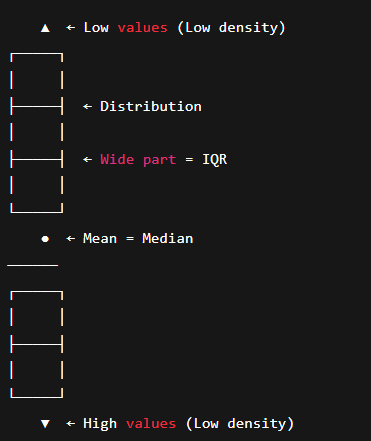

Text(0.5, 1.05, 'Outlier Detection using Boxplots')

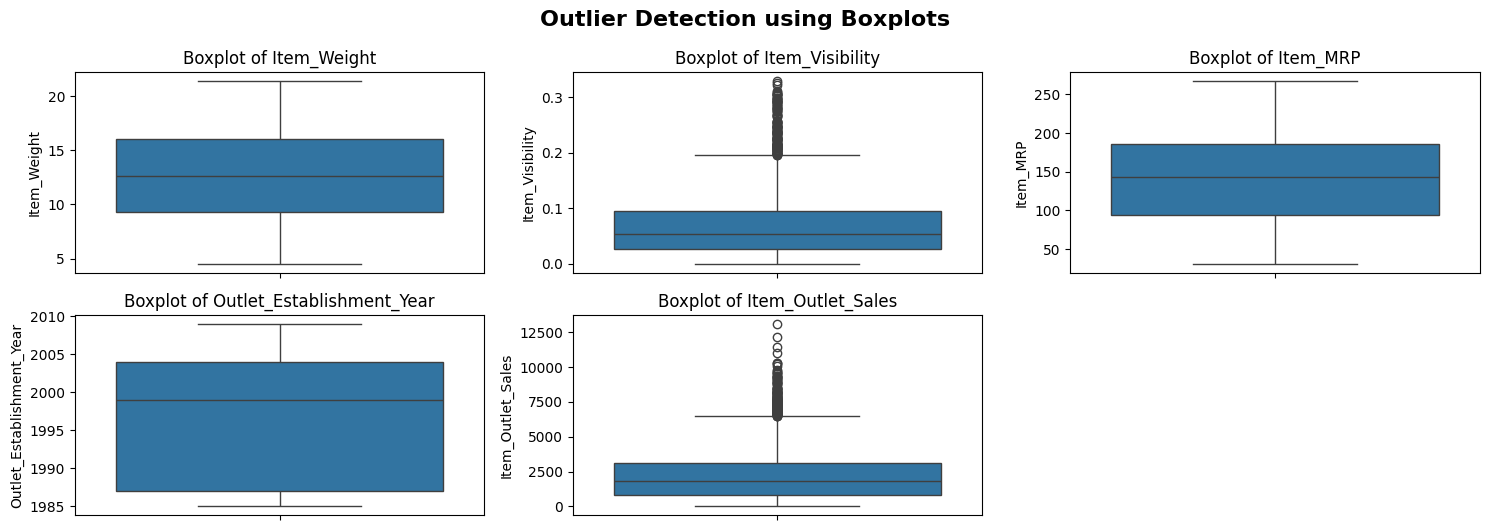

In [73]:
#Boxplot Method (Visualization)
# don't forget to make sure that while using boxplot or checking the outliers you can't pass any categorical columns

numerical_columns = ['Item_Weight','Item_Visibility','Item_MRP',
                    'Outlet_Establishment_Year','Item_Outlet_Sales']


plt.figure(figsize=(15, 5))

for i, feature in enumerate(numerical_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.tight_layout()

plt.suptitle("Outlier Detection using Boxplots", fontsize=16,fontweight="bold",y=1.05)


In [74]:
#IQR Method

for col in numerical_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound = Q1-1.5*IQR
        upper_bound = Q3+1.5*IQR
        
        outlier_perc = (((df[col]<lower_bound)|(df[col]>upper_bound)).sum())*100/len(df)
        print(f"{col}: {outlier_perc}")

Item_Weight: 0.0
Item_Visibility: 1.689545934530095
Item_MRP: 0.0
Outlet_Establishment_Year: 0.0
Item_Outlet_Sales: 2.1823301654347063


now you will see 2 columns with outliers and we will try to handle oultiers in those 2 columns

In [75]:
# Handling Outliers using IQR Method
# Two ways:
# Deleting rows  --> Use when outliers % is small (<5%)
# Capping values --> Use in production to avoid data loss

oultiers_column = ['Item_Outlet_Sales','Item_Visibility']


    # CAPPING OUTLIERS (SAFE METHOD)
    # Use When:
    # - You don't want to lose data
    # - Working in production
    # - Column has important extreme values
    # df[col] = df[col].clip(lower, upper)
    # print(f"{col} cleaned using capping method")


    # DELETING OUTLIERS (WORKING)
    # Use when:
    # - Dataset is large
    # - Outliers percentage is very small
    # - Column is NOT target variable
## small percentage so i will delete them
for col in numerical_columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5*iqr
        upper_bound = q3 + 1.5*iqr
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


# Skewness Handling


In [76]:
# N = number of rows
# N = train_data.shape[0]

# Calculate skewness for numeric features
def skewness (col):
    return df[col].skew().round(2)

for col in numerical_columns:
    print (f"{col} : {skewness(col)}")

Item_Weight : 0.12
Item_Visibility : 0.74
Item_MRP : 0.15
Outlet_Establishment_Year : -0.44
Item_Outlet_Sales : 0.77


In [77]:
# Apply log transformation for features with |skewness| > 1
for col in numerical_columns:
    if (np.abs(skewness(col)))>1:
        df[col] = np.log(1+np.abs(df[col]))

# Encoding Categorical columns

In [78]:
#Encode categorical features with label encoding
from sklearn.preprocessing import LabelEncoder
cat_cols = df.select_dtypes('object')

for col in cat_cols:
    le = LabelEncoder()
    df[col]=le.fit_transform(df[col])
    

In [79]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
